In [1]:
import numpy as np 

import matplotlib.pyplot as plt


# This import is needed to modify the way figure behaves
from mpl_toolkits.mplot3d import Axes3D
Axes3D
%matplotlib inline 

from ipywidgets import *

import pickle_functions as PK
import plot_functions as PL
import helpers as HL

%load_ext autoreload
np.random.seed(123)
%autoreload 2

# Section III B-1: Applying the Algorithms, LLE

In this section, an ordinary Swiss roll with 1000 data points and noise set to 0.01 is used. The effect of the  hyperparameters for LLE are explored. 

In [2]:
folder="SectionB"

## Importing and plotting the data set: 

In [3]:
color,X,X_2d=PK.get_swiss_roll(folder, create=False, n=1000, noise=0.01)

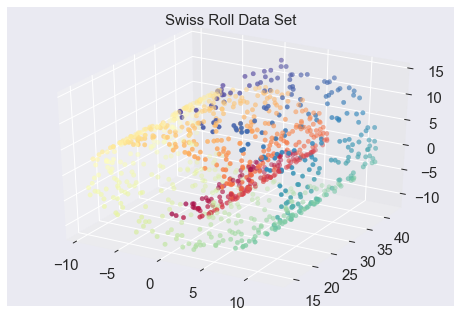

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Swiss Roll Data Set")
fig.patch.set_facecolor(color='w')
plt.savefig('dataset.pdf')
plt.show()

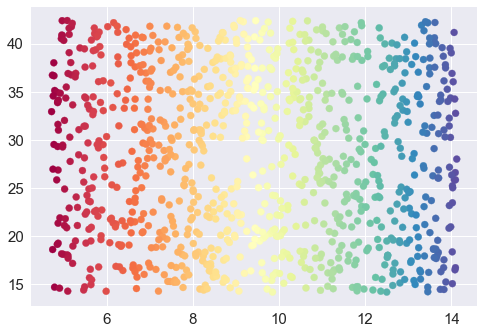

In [5]:
HL.plot_2d(X_2d,color)

## Applying LLE

We want to apply the LLE algorithm, and play around with the hyperparameters.

# Analysing the effect of number of nearest neighbours

In [6]:
n_Y,n_neighbors, n_times,n_reconstruction_error,n_differences=PK.n_neighbors(folder=folder,create=False)

In [7]:
interactive(PL.plot_inter, Z=fixed(n_Y), color=fixed(color),var=fixed(n_neighbors),variable=fixed('n_neighbors'),
            transformation=fixed('LLE'),i=widgets.IntSlider(min=0,max=len(n_neighbors)-1,step=1, value=0),
           error=fixed(n_reconstruction_error),times=fixed(n_times),difference=fixed(n_differences)
           ,error_type=fixed('reconstruction error'))




/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# Analysing the effect of reg

In [8]:
r_Y,reg, r_times,r_reconstruction_error,r_differences=PK.n_reg(folder,create=False)

In [9]:
interactive(PL.plot_inter, Z=fixed(r_Y), color=fixed(color),var=fixed(reg),variable=fixed('reg'), 
            transformation=fixed('LLE'),i=widgets.IntSlider(min=0,max=len(reg)-1,step=1, value=0),
           error=fixed(r_reconstruction_error),times=fixed(r_times),difference=fixed(r_differences)
           ,error_type=fixed('reconstruction error'))



/Users/HeddaVik/anaconda/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


# Plotting for Report

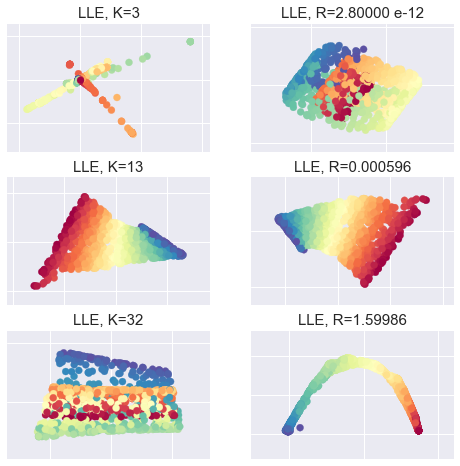

In [11]:
# Plotting a smaller figure that can be included in the report: 
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(321)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, K=3')
ax.scatter(n_Y[0][:, 0], n_Y[0][:, 1], c=color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(323)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, K=13')
ax.scatter(n_Y[10][:, 0], n_Y[10][:, 1], c=color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(325)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, K=32')
ax.scatter(n_Y[29][:, 0], n_Y[29][:, 1], c=color, cmap=plt.cm.Spectral)


ax = fig.add_subplot(322)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, R=2.80000 e-12')
ax.scatter(r_Y[5][:, 0], r_Y[5][:, 1], c=color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(324)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, R=0.000596')
ax.scatter(r_Y[22][:, 0], r_Y[22][:, 1], c=color, cmap=plt.cm.Spectral)
ax = fig.add_subplot(326)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_title('LLE, R=1.59986')
ax.scatter(r_Y[29][:, 0], r_Y[29][:, 1], c=color, cmap=plt.cm.Spectral)
plt.savefig('lle_original.pdf')